
# COS30049 - Assignment 2
### Session 26 Group 2
### Swinburne Univeristy of Technology

# 1.0 Data Collection

## 1.1 Verify the DataSet Can Be Read
Checks to verify:
- File exists
- Columns pesent
- No missing values

In [2]:
import pandas as pd
import os

In [3]:
file_path = "Constraint_English_Train.xlsx"

if os.path.exists(file_path):
    misinfo_data = pd.read_excel(file_path)
    print("Dataset loaded successfully!")
    print("Columns:", misinfo_data.columns.tolist())
    print(misinfo_data.head())
else:
    print("File not found:", file_path)

Dataset loaded successfully!
Columns: ['id', 'tweet', 'label']
   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real


## 1.2 Test Retrieval of Data Matching "CDC"

In [7]:
import pandas as pd
import re

file_path = "Constraint_English_Train.xlsx"
misinfo_data = pd.read_excel(file_path)

# Compile the regex pattern
pattern = re.compile(r'CDC', re.IGNORECASE)  # ignore case if needed

# Example: check in a specific column, e.g., 'text'
if 'text' in misinfo_data.columns:
    matches = misinfo_data['text'].apply(lambda x: bool(pattern.search(str(x))))
    print("Rows containing 'CDC':")
    print(misinfo_data[matches])
else:
    # If you want to search all columns
    matches = misinfo_data.applymap(lambda x: bool(pattern.search(str(x))))
    print("Rows containing 'CDC':")
    print(misinfo_data[matches.any(axis=1)])

Rows containing 'CDC':
        id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
6        7  If you tested positive for #COVID19 and have n...  real
27      28  Just Appendix B gathering all the state orders...  real
33      34  CDC Recommends Mothers Stop Breastfeeding To B...  fake
138    139  Youth sports organizations: As you resume acti...  real
...    ...                                                ...   ...
6338  6339  ???The CDC can detain anyone with a fever ??" ...  fake
6345  6346  1645 deaths were reported today bringing the t...  real
6377  6378  Acc to @CDCgov &amp; @WHO there is currently n...  real
6391  6392  The CDC ???adjusted the US Covid deaths from 1...  fake
6405  6406  The cloth face coverings recommended to slow s...  real

[281 rows x 3 columns]


C:\Users\wongh\AppData\Local\Temp\ipykernel_21628\3022997758.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches = misinfo_data.applymap(lambda x: bool(pattern.search(str(x))))


## 1.3 Combine data sets
- Datasets have been cleaned in Google Refine

In [8]:
train_df = pd.read_excel("Constraint_English_Train_GR.xlsx")
val_df = pd.read_excel("Constraint_English_Val_GR.xlsx")
test_df = pd.read_excel("Constraint_English_Test_GR.xlsx")

c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 2.0 Data preprocessing

We are using GR-tagged xlsx files instead of the original provided datasets. GR = Google Refine.

## 2.1 Emoji and Symbols Refining

### Test Emoji and Symbols Detection
- Keep symbols used in natural language

In [9]:
import pandas as pd
import re

df = pd.DataFrame({
    'text': ["Hello world", "Hi there 😀", "@user_name is cool", "No emojis here!", "symbol �"]
})

pattern = re.compile(r'[^\w\s@.,!?#]', flags=re.UNICODE)
df['has_emoji'] = df['text'].apply(lambda x: bool(pattern.search(str(x))))

print(df)

                 text  has_emoji
0         Hello world      False
1          Hi there 😀       True
2  @user_name is cool      False
3     No emojis here!      False
4            symbol �       True


### Test emoji refining

In [10]:
import pandas as pd
import re

df = pd.DataFrame(train_df)

# Step 1: Clean text safely
def clean_text(text):
    text = str(text)
    
    # Step 1a: Protect @usernames and #hashtags
    placeholders = {}
    for match in re.findall(r'(@\w+|#\w+)', text):
        ph = f"PLACEHOLDER{len(placeholders)}"
        placeholders[ph] = match
        text = text.replace(match, ph)
    
    # Step 1b: Replace all underscores with spaces
    text = text.replace('_', ' ')
    
    # Step 1c: Remove emojis / unusual symbols
    # Keep letters, numbers, whitespace, @, #, ., ,, !, ?
    text = re.sub(r'[^\w\s@.,!?#]', '', text, flags=re.UNICODE)
    
    # Step 1d: Remove leading punctuation (like . , ! ?) at start of text
    text = re.sub(r'^[.,!?_\s]+', '', text)
    
    # Step 1e: Restore usernames and hashtags
    for ph, original in placeholders.items():
        text = text.replace(ph, original)
    
    return text

# Apply cleaning function to the 'tweet' column
df['clean_text'] = df['tweet'].apply(clean_text)

# Optional: preview result
print(df[['tweet', 'clean_text']])

# Save cleaned file
df.to_excel("Constraint_English_Train_Cleaned.xlsx", index=False)

                                                  tweet  \
0     The CDC currently reports 99031 deaths. In gen...   
1     States reported 1121 deaths a small rise from ...   
2     Politically Correct Woman (Almost) Uses Pandem...   
3     #IndiaFightsCorona: We have 1524 #COVID testin...   
4     Populous states can generate large case counts...   
...                                                 ...   
6415  A tiger tested positive for COVID-19 please st...   
6416  Autopsies prove that COVID-19 is a blood clot,...   
6417  _A post claims a COVID-19 vaccine has already ...   
6418  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund   
6419  It has been 93 days since the last case of COV...   

                                             clean_text  
0     The CDC currently reports 99031 deaths. In gen...  
1     States reported 1121 deaths a small rise from ...  
2     Politically Correct Woman Almost Uses Pandemic...  
3     #IndiaFightsCorona We have 1524 #COVID testing...  
4

### Clean emojis on all 3 datasets

- Normalized usernames and hashtags instead of keeping them.

In [11]:
import pandas as pd
import re

# Step 1: Define cleaning function
def clean_text(text):
    text = str(text)
    
    # Step 1a: Normalize links, usernames and hashtags 
    # Normalize @usernames to <USER>
    text = re.sub(r'@\w+', '<USER>', text)

    # Normalize #hashtags to <HASHTAG:topic>
    def replace_hashtag(match):
        hashtag = match.group()[1:]  # remove #
        return f"<HASHTAG:{hashtag}>"
    
    text = re.sub(r'#\w+', replace_hashtag, text)
    
    # Normalize links
    text = re.sub(r'https?://\S+|www\.\S+', '<LINK>', text)
    
    # Step 1b: Replace all underscores 
    text = text.replace('_', '')
    
    # Step 1c: Remove emojis / unusual symbols
    # Keep letters, numbers, whitespace, @, #, ., ,, !, ?
    text = re.sub(r'[^\w\s@.,!?#<>:;]', '', text, flags=re.UNICODE)
    
    # Step 1d: Remove leading punctuation (like . , ! ?) at start of text
    text = re.sub(r'^[.,!?_\s]+', '', text)
    
    return text


# Step 2: Define helper function for cleaning datasets
def clean_dataset(input_path, output_path, text_column='tweet'):
    """
    Reads a dataset, cleans the specified text column, and saves cleaned dataset.
    """
    df = pd.read_excel(input_path)

    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in dataset.")

    df['clean_text'] = df[text_column].apply(clean_text)

    df.to_excel(output_path, index=False)
    print(f"Cleaned dataset saved to {output_path}")


# Step 3: Clean train, validation, and test datasets
datasets = [
    ("Constraint_English_Train_GR.xlsx", "Constraint_English_Train_Cleaned.xlsx"),
    ("Constraint_English_Val_GR.xlsx", "Constraint_English_Val_Cleaned.xlsx"),
    ("Constraint_English_Test_GR.xlsx", "Constraint_English_Test_Cleaned.xlsx")
]

for input_path, output_path in datasets:
    clean_dataset(input_path, output_path)

c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Train_Cleaned.xlsx


c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Val_Cleaned.xlsx
Cleaned dataset saved to Constraint_English_Test_Cleaned.xlsx


c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 2.2 Remove Stopwords
- use nltk library

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## 1.6 Lemmatization
- Lemmatization cleans word forms that has "-ing" so that words are in keyword forms.
- uses Spacy or NLTK
- choice: Spacy (more accurate and faster, but larger)
- it also tokenize words

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

## 2.3 Spelling Correction
- Tools available: TextBlob, SymSpell, Hunspell or pyspellchecker
- TextBlob - 36.4s (good for small datasets)
- Spellchecker - 36.6s

In [15]:
from textblob import TextBlob

def correct_spelling(text):
    return str(TextBlob(text).correct())

In [16]:
import nltk
nltk.download('punkt', download_dir="/Users/zara/nltk_data")
nltk.data.path.append("/Users/zara/miniconda3/envs/ctip")

[nltk_data] Downloading package punkt to /Users/zara/nltk_data...


PermissionError: [WinError 5] Access is denied: '/Users/zara'

- conda info --envs
- replace /Users..... to your own path

## 2.4 Improved final code
- added hashtag, link and user mention normalization, word lemetization (+ removed spaces due to lemetization), and spell checking.

Tools:
1. pandas - reading and writing excel datasets (pd.red_excel, df.to_excel)
2. re (regex) - Text normalization (usernames, hashtags, links) and symbol removal.
3. nltk - stopword removal 
4. spacy - lemmatization 
5. textblob - spelling correction
6. lambda + regex - placeholder integrity


Preprocessing steps taken:
- username to <USER>
- hashatags to <HASHTAG:topic>
- links to <LINK>
- removed underscores
- removed emojis/weird symbols 
- removed leading punctuations
- removed stopwords - split text intp tokens, filter stopwords and rejoin
- lemmatization - convert words to their root form (avoid pronouns)
- remove spaces in placeholders after lemmetization
- spelling correction 

Dataset Processing
- Reads each dataset (pd.read_excel)
- Applies cleaning to a specified column (tweet)
- Writes cleaned data to a new Excel file.
- Processes multiple datasets in a loop.


Observations: there are still some spaces in placeholders <> after lemmetization even when spaces are removed with regex.

In [17]:
import pandas as pd
import re
import nltk
import spacy
from textblob import TextBlob
#from spellchecker import SpellChecker

#spell = SpellChecker()

# Function - Lemmatize
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

# Function - Remove spaces from lemmaitization
def remove_spaces_in_placeholders(text):
    return re.sub(r'<\s*(.*?)\s*>', lambda m: f"<{m.group(1).replace(' ', '')}>", text)

# Function - Spelling correction (TextBlob)
def correct_spelling(text):
    return str(TextBlob(text).correct())

# Function - Spelling correction (spellchecker)
# def correct_spelling(text):
#     return " ".join(spell.correction(word) or word for word in text.split())

# Function - Hashtag normalization function
def replace_hashtag(match):
    hashtag = match.group()[1:].lower()
    return f"<HASHTAG:{hashtag}>"

# Download stopwords once
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
negations = {"no", "not", "nor", "never"}
stop_words -= negations

# Cleaning function
def clean_text(text, do_lemmatize=True, do_spellcheck=False):
    text = str(text)

    # Normalize usernames, hashtags, and links
    text = re.sub(r'@\w+', '<USER>', text)
    text = re.sub(r'#\w+', replace_hashtag, text)
    text = re.sub(r'https?://\S+|www\.\S+', '<LINK>', text)

    # Remove underscores
    text = text.replace('_', '')

    # Remove emojis/unusual symbols but keep punctuation
    text = re.sub(r'[^\w\s@.,!?#<>:;]', '', text, flags=re.UNICODE)

    # Remove leading punctuation
    text = re.sub(r'^[.,!?_\s]+', '', text)

    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    text = " ".join(tokens)

    # Lemmatize and remove spaces 
    if do_lemmatize:
        text = lemmatize_text(text)
    text = remove_spaces_in_placeholders(text)

    # Spellcheck
    if do_spellcheck:
        text = correct_spelling(text)

    return text

# Dataset cleaning helper
def clean_dataset(input_path, output_path, text_column='tweet', do_lemmatize=True, do_spellcheck=False):
    df = pd.read_excel(input_path)

    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in dataset.")

    df['clean_text'] = df[text_column].apply(lambda x: clean_text(x, do_lemmatize, do_spellcheck))

    df.to_excel(output_path, index=False)
    print(f"Cleaned dataset saved to {output_path}")

# Run cleaning for datasets
datasets = [
    ("Constraint_English_Train_GR.xlsx", "Constraint_English_Train_Cleaned.xlsx"),
    ("Constraint_English_Val_GR.xlsx", "Constraint_English_Val_Cleaned.xlsx"),
    ("Constraint_English_Test_GR.xlsx", "Constraint_English_Test_Cleaned.xlsx")
]

for input_path, output_path in datasets:
    clean_dataset(input_path, output_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Train_Cleaned.xlsx


c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Val_Cleaned.xlsx


c:\Users\wongh\anaconda3\envs\ctip\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Test_Cleaned.xlsx


# 3.0 Machine Model Selection
- supervised ML (classifies real vs fake)
- feature extraction: Uses TF-IDF vectorization, a method that scores words based on how important they are in the text. Used with:
  - Unigrams + bigrams 
  - vocabulary size limited to 5000 most useful words/phrases
  - Frequency thresholds:
	- 	Ignore words that appear in fewer than 5 documents - min_df=5 (rare words).
	- 	Remove words that appear in more than 90% of documents - max_df=0.9 (overly common words).
- model selection: 
  - Logic regression as primary classifier for text data
    - Uses max_iter=1000 (training rounds) so the model can stabilise properly
  - KNN used for baseline comparison
    - less effective on sparse data
- Evaluation
  - metrics report:
    - accuracy (overall % correct)
    - f1 score  (balances precision and recall)
    - Classification report (precision, recall, F1 per class “real” and “fake”)
    - Confusion matrix heatmap for error analysis.
  - Confusion matrix shows counts of correct and incorrect predictions for samples in test dataset. 

## Why this selection?
- TF-IDF + Logistic Regression is a well-established baseline for text classification and misinformation detection, balancing interpretability and performance.
- N-grams capture short contextual dependencies that are crucial in misinformation (e.g., “not true”, “fake news”).
- Feature limits & frequency cutoffs prevent overfitting on noise, slang, or rare hashtags.
- The inclusion of KNN shows experimentation with alternative models, but Logistic Regression is the practical choice.

Validation Results:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1020
           1       0.93      0.94      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Test Results:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.92      0.95      0.94        38

    accuracy                           0.90        51
   macro avg       0.88      0.86      0.87        51
weighted avg       0.90      0.90      0.90        51

KNN Validation Results:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1020
           1       0.95      0.82      0.88      1120

    accuracy                           0.88      2140
   macro avg       0.89      0.89      0.88      2140
weighted avg    

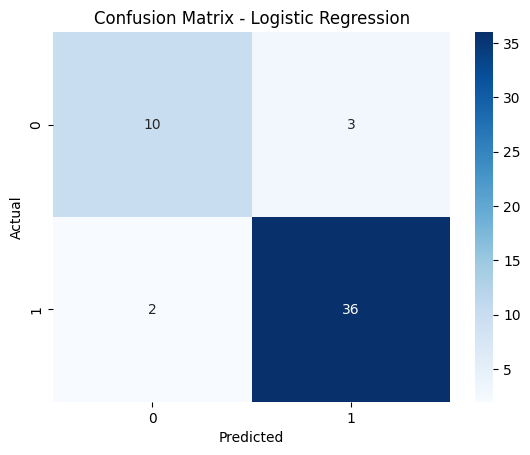

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load prcoessed datasets
train_df = pd.read_excel("Constraint_English_Train_Cleaned.xlsx")
val_df = pd.read_excel("Constraint_English_Val_Cleaned.xlsx")
test_df = pd.read_excel("Constraint_English_Test_Cleaned.xlsx")

# Labels
y_train = train_df['label'].map({'real': 1, 'fake': 0})
y_val = val_df['label'].map({'real': 1, 'fake': 0})
y_test = test_df['label'].map({'real': 1, 'fake': 0})

# TF-IDF vectorization with improvements
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),      # Include unigrams and bigrams
    max_features=5000,       # Limit vocabulary size
    min_df=5,                # Minimum document frequency
    max_df=0.9,              # Remove very common words
)

# Fit vectorizer on training data
X_train_vec = vectorizer.fit_transform(train_df['clean_text'])
X_val_vec = vectorizer.transform(val_df['clean_text'])
X_test_vec = vectorizer.transform(test_df['clean_text'])

# Train Logistic Regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_vec, y_train)

# Validate model 
y_val_pred = log_reg.predict(X_val_vec)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

# Test model 
y_test_pred = log_reg.predict(X_test_vec)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

# # Comparison: KNN 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

y_val_pred_knn = knn.predict(X_val_vec)
print("KNN Validation Results:")
print(classification_report(y_val, y_val_pred_knn))

y_test_pred_knn = knn.predict(X_test_vec)
print("KNN Test Results:")
print(classification_report(y_test, y_test_pred_knn))

# Test data
print("y_test length:", len(y_test))
print("X_test_vec shape:", X_test_vec.shape)
print("Predictions length:", len(y_test_pred))
print("First few y_test values:", y_test.head())
print("First few predictions:", y_test_pred[:10])
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Logistic Regression Test F1 Score:", f1_score(y_test, y_test_pred))

# Metrics and Confusion Matrix 
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



y-axis:
0 Actual Negative
1 Actual Postive

x-axis:
0 Predicted Negative
1 Predicated positive

0,0 - True Negative
0,1 - False Negative
0,1 - False Positve
1,1 - True Postive

- 10 Samples were actually fake, and correctly predicted as fake
- 36 Samples were acutally true, and correctly predicted as true 

# Extras: Tests and Comparisons

### Tests

In [21]:
# Get all features (unigrams + bigrams)
feature_names = vectorizer.get_feature_names_out()

# Filter only bigrams (words with a space)
bigrams = [word for word in feature_names if " " in word]

print(f"Number of bigrams: {len(bigrams)}")
print("Example bigrams:", bigrams[:20])

bigram_vectorizer = TfidfVectorizer(
    ngram_range=(2, 2),   # Only bigrams
    max_features=5000,
    min_df=5,
    max_df=0.9
)


Number of bigrams: 2042
Example bigrams: ['00 confirmed', '00 pm', '000 people', '04 2020', '08 00', '09 30', '10 000', '10 day', '10 lakh', '10 million', '10 pm', '10 second', '10 statesuts', '100 people', '1000 death', '1000 link', '10000 case', '1000190000 confirm', '11 00', '11 lakh']


### Vectorizer that only uses bigrams

In [22]:
bigram_vectorizer = TfidfVectorizer(
    ngram_range=(2, 2),   # Only bigrams
    max_features=5000,
    min_df=5,
    max_df=0.9
)

X_train_bigram = bigram_vectorizer.fit_transform(train_df['clean_text'])
X_val_bigram = bigram_vectorizer.transform(val_df['clean_text'])
X_test_bigram = bigram_vectorizer.transform(test_df['clean_text'])

log_reg_bigram = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bigram.fit(X_train_bigram, y_train)

y_val_pred_bigram = log_reg_bigram.predict(X_val_bigram)
y_test_pred_bigram = log_reg_bigram.predict(X_test_bigram)

print("Validation Results (Bigrams Only):")
print(classification_report(y_val, y_val_pred_bigram))

print("Test Results (Bigrams Only):")
print(classification_report(y_test, y_test_pred_bigram))

print("Bigram Test Accuracy:", accuracy_score(y_test, y_test_pred_bigram))
print("Bigram Test F1 Score:", f1_score(y_test, y_test_pred_bigram))

Validation Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1020
           1       0.91      0.88      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140

Test Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.97      0.87      0.92        38

    accuracy                           0.88        51
   macro avg       0.84      0.90      0.86        51
weighted avg       0.90      0.88      0.89        51

Bigram Test Accuracy: 0.8823529411764706
Bigram Test F1 Score: 0.9166666666666666


### Most influential bigrams
- uses logistic regression coeffiecients mapped back to features

In [24]:
import numpy as np

coef = log_reg.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Create dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
})

# Filter bigrams
bigram_coef_df = coef_df[coef_df['feature'].str.contains(" ")]

# Sort by absolute coefficient value
bigram_coef_df = bigram_coef_df.reindex(bigram_coef_df.coef.abs().sort_values(ascending=False).index)

print("Top influential bigrams:")
print(bigram_coef_df.head(20))

Top influential bigrams:
                        feature      coef
1860            hashtag covid19  7.360339
2432               link hashtag -3.221148
953         coronavirus hashtag -3.172796
3604                    rt user  2.639841
1885  hashtag indiafightscorona  2.365095
4408               user hashtag  2.026406
1061            covid19 hashtag -1.881090
652                case hashtag  1.746163
1852    hashtag coronavirusfact -1.683887
1964                  here link  1.639278
1859              hashtag covid  1.576866
2733            new coronavirus -1.513123
1020                   covid 19 -1.357053
2663                  more link  1.327422
3892               state report  1.288036
943            coronavirus case -1.281925
3858             spread hashtag  1.271841
974        coronavirusfact link -1.252866
4244               total number  1.246529
2513           manage isolation  1.244630


## Comparison

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import numpy as np

def test_ngram_ranges_with_bigrams(train_texts, val_texts, test_texts, y_train, y_val, y_test,
                                     max_features=5000, min_df=5, max_df=0.9,
                                     top_n_bigrams=20):
    results = []

    for ngram_range in [(1, 1), (2, 2), (1, 2)]:
        print(f"\n=== Testing ngram_range={ngram_range} ===")

        vectorizer = TfidfVectorizer(
            ngram_range=ngram_range,
            max_features=max_features,
            min_df=min_df,
            max_df=max_df
        )

        X_train_vec = vectorizer.fit_transform(train_texts)
        X_val_vec = vectorizer.transform(val_texts)
        X_test_vec = vectorizer.transform(test_texts)

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_vec, y_train)

        y_val_pred = model.predict(X_val_vec)
        y_test_pred = model.predict(X_test_vec)

        val_acc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)

        test_acc = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        print("Validation Results:")
        print(classification_report(y_val, y_val_pred))
        print("Test Results:")
        print(classification_report(y_test, y_test_pred))

        results.append({
            "ngram_range": ngram_range,
            "val_accuracy": val_acc,
            "val_f1": val_f1,
            "test_accuracy": test_acc,
            "test_f1": test_f1
        })

        # If bigrams are included, show top bigrams
        if ngram_range[1] >= 2:
            feature_names = vectorizer.get_feature_names_out()
            coef = model.coef_[0]

            bigram_features = [
                (feature, coef[i])
                for i, feature in enumerate(feature_names) if " " in feature
            ]

            bigram_features_sorted = sorted(bigram_features, key=lambda x: abs(x[1]), reverse=True)
            print(f"\nTop {top_n_bigrams} bigrams for ngram_range={ngram_range}:")
            for feature, weight in bigram_features_sorted[:top_n_bigrams]:
                print(f"{feature}: {weight:.4f}")

    return pd.DataFrame(results)

# Usage:
comparison_df = test_ngram_ranges_with_bigrams(
    train_df['clean_text'],
    val_df['clean_text'],
    test_df['clean_text'],
    y_train, y_val, y_test
)

print("\n=== Ngram Range Performance Comparison ===")
print(comparison_df)


=== Testing ngram_range=(1, 1) ===
Validation Results:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1020
           1       0.91      0.92      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Test Results:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.92      0.95      0.94        38

    accuracy                           0.90        51
   macro avg       0.88      0.86      0.87        51
weighted avg       0.90      0.90      0.90        51


=== Testing ngram_range=(2, 2) ===
Validation Results:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1020
           1       0.91      0.88      0.90      1120

    accuracy                           0.89      2140
  

### Notes:
- (1,1) Unigrams
- (2,2) Bigrams
- (1,2) Unigrams + Bigrams

## SVM Model

### Support Vector Machine (SVM) Model Version
- **Model type:** Linear Support Vector Classifier (`LinearSVC`)  
- **Purpose:** Evaluates performance of a margin-based linear classifier on the same TF-IDF text features.
- **Key characteristics:**
  - SVM aims to find the *optimal hyperplane* that maximally separates “real” and “fake” classes in a high-dimensional vector space.
  - Performs well in high-dimensional, sparse feature spaces typical of text data.
  - Uses `LinearSVC` (efficient linear version of SVM) for scalability on thousands of TF-IDF features.
  - Default regularization parameter `C=1.0` was used; tuning could further optimize results.

- **Validation performance:**  
  - Accuracy: **94%**  
  - F1-score (weighted): **0.94**  
  - Balanced performance across both classes (`real` and `fake`).

- **Test performance:**  
  - Accuracy: **90%**  
  - F1-score (class “real”): **0.93**  
  - Strong recall (0.92) for the “real” class — shows that the SVM generalizes well with minimal overfitting.
  - Performs slightly better on minority class detection compared to KNN.

- **Confusion Matrix Insight:**  
  - Most misclassifications occurred on the smaller “fake” class (13 samples in test set), likely due to class imbalance.
  - Green heatmap visualization clearly shows a diagonal dominance (indicating high correctness).

#### Why include SVM?
- To test a **margin-based linear classifier** against logistic regression, since both handle text data well but optimize different objective functions.
- SVM can outperform logistic regression when classes are not easily separable or when data has high variance.
- Adds robustness to the experiment by comparing **probabilistic (Logistic Regression)** vs **margin-based (SVM)** classifiers.
- Result shows that **SVM achieved similar accuracy to Logistic Regression** but slightly improved precision–recall balance on smaller datasets.


SVM Validation Results:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1020
           1       0.94      0.95      0.95      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

SVM Test Results:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.95      0.92      0.93        38

    accuracy                           0.90        51
   macro avg       0.87      0.88      0.87        51
weighted avg       0.91      0.90      0.90        51

SVM Test Accuracy: 0.9019607843137255
SVM Test F1 Score: 0.9333333333333333


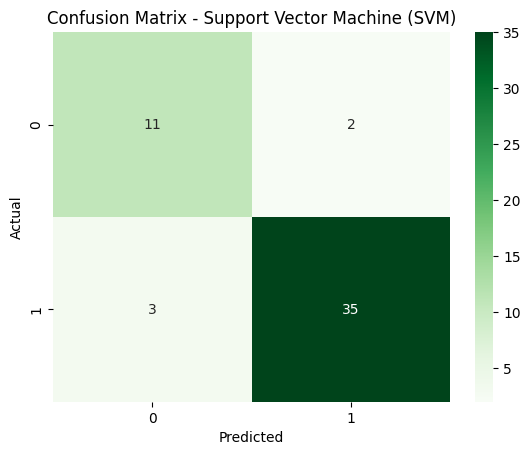

In [ ]:
from sklearn.svm import LinearSVC 

# train support vector machine (SVM)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_vec, y_train)

# validation results
y_val_pred_svm = svm_model.predict(X_val_vec)
print("SVM Validation Results:")
print(classification_report(y_val, y_val_pred_svm))

# test results
y_test_pred_svm = svm_model.predict(X_test_vec)
print("SVM Test Results:")
print(classification_report(y_test, y_test_pred_svm))

# additional metrics
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_test_f1 = f1_score(y_test, y_test_pred_svm)
print("SVM Test Accuracy:", svm_test_accuracy)
print("SVM Test F1 Score:", svm_test_f1)

# confusion matrix visualization
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.show()


# SVM Model Using Bigrams Only

1. **Bigram TF-IDF Vectorization**
   - Creates features only from bigrams (pairs of consecutive words).  
   - Limits vocabulary to 5000 features.  
   - Ignores very rare (<5 docs) and very common (>90% docs) bigrams.  

2. **Transform Training, Validation, and Test Data**
   - Training set: learns vocabulary and computes TF-IDF values.  
   - Validation/Test sets: transformed using the same learned vocabulary.  

3. **SVM Training**
   - Linear Support Vector Machine (`LinearSVC`) trained on bigram features only.  

4. **Validation & Testing**
   - Predicts labels on validation and test sets.  
   - `classification_report()` shows precision, recall, F1-score, and support.  

5. **Performance Metrics**
   - Accuracy: proportion of correct predictions.  
   - F1-score: harmonic mean of precision and recall; useful for imbalanced classes.  

6. **Confusion Matrix**
   - Visual representation of true vs predicted labels.  
   - Helps identify misclassifications between classes.  

7. **Observations from Results**
   - **Validation Set:**  
     - Accuracy ≈ 0.89, F1-score ≈ 0.89  
     - Both classes have relatively balanced precision/recall.  
   - **Test Set:**  
     - Accuracy ≈ 0.86, F1-score ≈ 0.90  
     - Class `0` (fake) has slightly lower precision (0.69) but good recall (0.85)  
     - Class `1` (real) performs better (precision 0.94, recall 0.87)  
   - Using **bigrams only** slightly reduces overall accuracy compared to unigrams + bigrams, but still maintains strong F1-scores.


SVM Validation Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1020
           1       0.92      0.88      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.90      0.89      2140
weighted avg       0.90      0.89      0.89      2140

SVM Test Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.94      0.87      0.90        38

    accuracy                           0.86        51
   macro avg       0.82      0.86      0.83        51
weighted avg       0.88      0.86      0.87        51

SVM Test Accuracy (Bigrams Only): 0.8627450980392157
SVM Test F1 Score (Bigrams Only): 0.9041095890410958


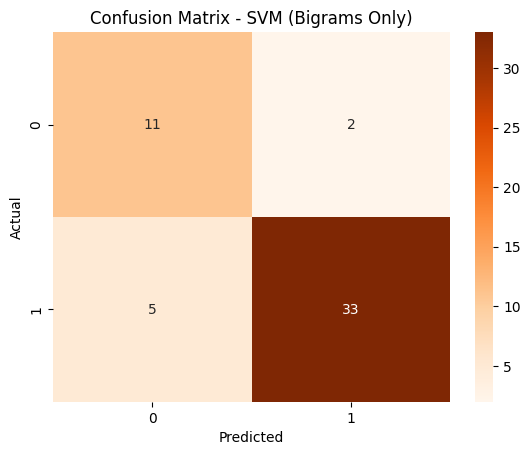

In [ ]:
# create bigram-only TF-IDF vectors
bigram_vectorizer = TfidfVectorizer(
    ngram_range=(2, 2),   # Only bigrams
    max_features=5000,
    min_df=5,
    max_df=0.9
)

# fit on training data and transform
X_train_bigrams = bigram_vectorizer.fit_transform(train_df['clean_text'])
X_val_bigrams = bigram_vectorizer.transform(val_df['clean_text'])
X_test_bigrams = bigram_vectorizer.transform(test_df['clean_text'])

# train SVM on bigrams only
svm_bigram_model = LinearSVC(random_state=42)
svm_bigram_model.fit(X_train_bigrams, y_train)

# validate bigram-only SVM
y_val_pred_bigram = svm_bigram_model.predict(X_val_bigrams)
print("SVM Validation Results (Bigrams Only):")
print(classification_report(y_val, y_val_pred_bigram))

# test bigram-only SVM
y_test_pred_bigram = svm_bigram_model.predict(X_test_bigrams)
print("SVM Test Results (Bigrams Only):")
print(classification_report(y_test, y_test_pred_bigram))

# additional metrics
svm_bigram_accuracy = accuracy_score(y_test, y_test_pred_bigram)
svm_bigram_f1 = f1_score(y_test, y_test_pred_bigram)
print("SVM Test Accuracy (Bigrams Only):", svm_bigram_accuracy)
print("SVM Test F1 Score (Bigrams Only):", svm_bigram_f1)

# confusion matrix for bigram SVM
cm_bigram = confusion_matrix(y_test, y_test_pred_bigram)
sns.heatmap(cm_bigram, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Bigrams Only)")
plt.show()


# SVM Model Performance Comparison

1. **Purpose**
   - Compare metrics between two SVM models: 
   
     a) Original SVM (unigrams + bigrams)  
     b) SVM trained on bigrams only  

2. **Metrics Included**
   - Test Accuracy  
   - Test F1 Score  

3. **Results Observations**
   - Original SVM (unigrams + bigrams):  
     - Accuracy ≈ 0.90, F1-score ≈ 0.93  
     - Slightly better performance than bigram-only SVM.  
   - Bigram-only SVM:  
     - Accuracy ≈ 0.86, F1-score ≈ 0.90  
     - Performance slightly lower but still reasonable, especially for class `1` (real news).  

4. **Conclusion**
   - Including unigrams alongside bigrams improves overall SVM performance.  
   - Bigram-only features can still be useful, especially if the focus is on phrase patterns, but may lose some general context captured by unigrams.


In [ ]:
import pandas as pd

# collect metrics for comparison
comparison_metrics = {
    "Model": ["SVM (Unigrams + Bigrams)", "SVM (Bigrams Only)"],
    "Test Accuracy": [svm_test_accuracy, svm_bigram_accuracy],
    "Test F1 Score": [svm_test_f1, svm_bigram_f1]
}

comparison_df = pd.DataFrame(comparison_metrics)

# display the comparison
print("SVM Model Performance Comparison:")
print(comparison_df)


SVM Model Performance Comparison:
                      Model  Test Accuracy  Test F1 Score
0  SVM (Unigrams + Bigrams)       0.901961       0.933333
1        SVM (Bigrams Only)       0.862745       0.904110


# Top Influential Bigrams for SVM

1. **Purpose**
   - Identify which bigrams (two-word phrases) have the strongest influence on the SVM model's predictions.
   - Positive coefficients push the model toward predicting class `1` (real news).  
   - Negative coefficients push the model toward predicting class `0` (fake news).

2. **Observations from Results**
   - Strong positive bigrams (class `1` - real):
     - "hashtag covid19" → coef = 5.30  
     - "local lockdown" → coef = 1.69  
     - "say link" → coef = 1.45  
     - "hashtag coronavirus" → coef = 1.41  
     - "rt user" → coef = 1.38  

   - Strong negative bigrams (class `0` - fake):
     - "coronavirus hashtag" → coef = -2.31  
     - "covid19 hashtag" → coef = -1.62  
     - "link hashtag" → coef = -1.57  
     - "testing kit" → coef = -1.40  
     - "coronavirus case" → coef = -1.32  

3. **Interpretation**
   - Bigrams with "hashtag covid19", "local lockdown", or "rt user" are highly indicative of real news content.  
   - Bigrams like "coronavirus hashtag" or "link hashtag" are indicative of fake news patterns, possibly reflecting spammy or misleading content.  
   - This analysis helps understand **which phrases the SVM model considers most predictive** and can guide feature engineering or model explainability.

4. **Next Steps**
   - Optionally, visualize these top bigrams with a **bar chart**, using coefficients as the bar heights to make the results more intuitive.  
   - Consider combining unigram + bigram coefficient analysis for a complete feature importance overview.


In [ ]:
import numpy as np
import pandas as pd

# extract coefficients from trained SVM (LinearSVC)
coef = svm_model.coef_[0]  # replace svm_model with the SVM instance you trained
feature_names = vectorizer.get_feature_names_out()  # use the same vectorizer you trained SVM with

# create dataframe of features and coefficients
coef_df_svm = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
})

# filter only bigrams
bigram_coef_df_svm = coef_df_svm[coef_df_svm['feature'].str.contains(" ")]

# sort by absolute coefficient value (most influential bigrams first)
bigram_coef_df_svm = bigram_coef_df_svm.reindex(bigram_coef_df_svm.coef.abs().sort_values(ascending=False).index)

# display top 20 influential bigrams for SVM
print("Top influential bigrams for SVM:")
print(bigram_coef_df_svm.head(20))


Top influential bigrams for SVM:
                        feature      coef
1860            hashtag covid19  5.296896
953         coronavirus hashtag -2.313167
2447             local lockdown  1.692295
1061            covid19 hashtag -1.621350
2432               link hashtag -1.573988
3638                   say link  1.451031
1851        hashtag coronavirus  1.408671
1859              hashtag covid  1.405086
4126                testing kit -1.401423
3604                    rt user  1.382948
1885  hashtag indiafightscorona  1.370759
943            coronavirus case -1.320450
3671            second national  1.309335
1318                   die link  1.254187
4519                  warn link  1.233100
1020                   covid 19 -1.202280
1998               home hashtag  1.163818
3010           pandemic hashtag -1.163609
4408               user hashtag  1.135694
4091               test hashtag  1.099609
